# 빙고
* baekjoon 2578 https://www.acmicpc.net/problem/2578

## 문제
빙고 게임은 다음과 같은 방식으로 이루어진다.

먼저 아래와 같이 25개의 칸으로 이루어진 빙고판에 1부터 25까지 자연수를 한 칸에 하나씩 쓴다

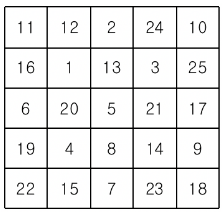

다음은 사회자가 부르는 수를 차례로 지워나간다. 예를 들어 5, 10, 7이 불렸다면 이 세 수를 지운 뒤 빙고판의 모습은 다음과 같다.

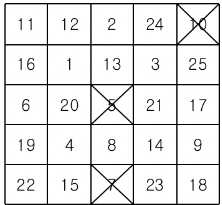

차례로 수를 지워가다가 같은 가로줄, 세로줄 또는 대각선 위에 있는 5개의 모든 수가 지워지는 경우 그 줄에 선을 긋는다.

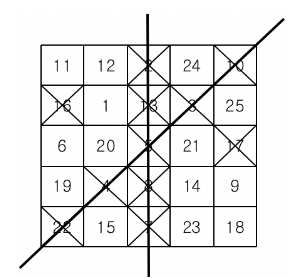

이러한 선이 세 개 이상 그어지는 순간 "빙고"라고 외치는데, 가장 먼저 외치는 사람이 게임의 승자가 된다.

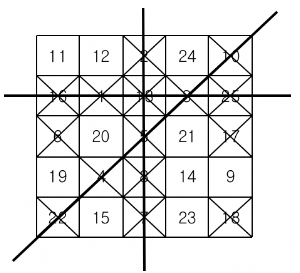

철수는 친구들과 빙고 게임을 하고 있다. 철수가 빙고판에 쓴 수들과 사회자가 부르는 수의 순서가 주어질 때, 사회자가 몇 번째 수를 부른 후 철수가 "빙고"를 외치게 되는지를 출력하는 프로그램을 작성하시오.

### 입력
첫째 줄부터 다섯째 줄까지 빙고판에 쓰여진 수가 가장 위 가로줄부터 차례대로 한 줄에 다섯 개씩 빈 칸을 사이에 두고 주어진다. 여섯째 줄부터 열째 줄까지 사회자가 부르는 수가 차례대로 한 줄에 다섯 개씩 빈 칸을 사이에 두고 주어진다. 빙고판에 쓰여진 수와 사회자가 부르는 수는 각각 1부터 25까지의 수가 한 번씩 사용된다.

### 출력
첫째 줄에 사회자가 몇 번째 수를 부른 후 철수가 "빙고"를 외치게 되는지 출력한다.

In [1]:
#빙고판을 그리는 것이 과연 중요한가?
#1이라는 숫자를 찾기 위헤 빙고판 전체를 탐색해야하나

#bingo=[[0 for i in range(5)] for i in range(5)]
#for i in range(5):
#    bingo[i][0],bingo[i][1],bingo[i][2],bingo[i][3],bingo[i][4]=map(int,input().split())


#bingo=[]
#for i in range(5):
#    bingo.append(list(map(int,input().split())))

#### 방법1

In [2]:
location = {}
bingo=[[0 for i in range(5)] for j in range(5)]
bingoCnt=0
for i in range(5):
    location.update(zip(list(map(int,input().split())),((i,0),(i,1),(i,2),(i,3),(i,4))))
callCnt=0
for _ in range(5):
    n = list(map(int,input().split()))
    for i in range(5):
        x,y = location.get(n[i])
        bingo[x][y]=1
        callCnt+=1
        if callCnt<12 : continue
        else:
            bingoCnt=0
            #가로
            for j in range(5):
                if bingo[0][j]==1:
                    cnt=1
                    for k in range(1,5):
                        if bingo[k][j]==1:
                            cnt+=1
                        else: break
                    if cnt==5:
                        bingoCnt+=1

            #세로
            for j in range(5):
                if bingo[j][0]==1:
                    cnt=1
                    for k in range(1,5):
                        if bingo[j][k]==1:
                            cnt+=1
                        else: break
                    if cnt==5:
                        bingoCnt+=1

            #대각선
            if (bingo[0][0]==1) and(bingo[1][1]==1) and(bingo[2][2]==1) and(bingo[3][3]==1) and(bingo[4][4]==1) :
                bingoCnt+=1
            if (bingo[0][4]==1) and(bingo[1][3]==1) and(bingo[2][2]==1) and(bingo[3][1]==1) and(bingo[4][0]==1) :
                bingoCnt+=1
            if bingoCnt>=3 :
                break
    if bingoCnt >= 3:
        break
print(callCnt)

11 12 2 24 10
16 1 13 3 25
6 20 5 21 17
19 4 8 14 9
22 15 7 23 18
5 10 7 16 2
4 22 8 17 13
3 18 1 6 25
15


#### 방법2

In [3]:
location = {}
bingoCnt=[0]*12
callCnt=0
for i in range(5):
    location.update(zip(list(map(int,input().split())),((i,0),(i,1),(i,2),(i,3),(i,4))))
callCnt=0
for _ in range(5):
    n = list(map(int,input().split()))
    for i in range(5):
        callCnt+=1
        x,y = location.get(n[i])
        bingoCnt[y]+=1   #숫자를 한번씩만 부르니까(곂치지 않으니까 가능) #세로줄
        bingoCnt[x+5]+=1 #가로줄
        if x==y : bingoCnt[10]+=1 #왼쪽에서 오른쪽 대각선
        if x+y==4 : bingoCnt[11]+=1 #오른쪽에서 왼쪽아래 대각선
        if bingoCnt.count(5) >=3 :
            break
    if bingoCnt.count(5)>=3:
        break
print(callCnt)

11 12 2 24 10
16 1 13 3 25
6 20 5 21 17
19 4 8 14 9
22 15 7 23 18
5 10 7 16 2
4 22 8 17 13
3 18 1 6 25
15
